In [1]:
import sys
sys.path.append('../') 
import LoadIntoDf

df = LoadIntoDf.load_sqlite_data()
# Display the DataFrame
df.head()


,p1447,p1073,p1448,p1074,p1449,p1075,p1450,p1076,p1451,p1077,...,p4838,p4839,p4840,p4841,p4842,p4843,p4844,p4845,angle,difficulty
uuid,,,,,,,,,,,,,,,,,,,,,
00007DA715CE4E7DBF60928D240CE7F2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,6b/V4
00007DA715CE4E7DBF60928D240CE7F2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,50,6a/V3
0004ff002424476b8e64256dbe0aed1f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,6a/V3
00079a6f946b4c26ba25123f77f41ea8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,4c/V0
00079a6f946b4c26ba25123f77f41ea8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,60,7b/V8


In [40]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.preprocessing import OrdinalEncoder

X = csr_matrix(df.drop('difficulty', axis=1).values)
y = df.difficulty.str.split('/').str[0]

categories = ['4a', '4b', '4c', 
'5a', '5b', '5c', 
'6a', '6a+', '6b', '6b+', '6c', '6c+', 
'7a', '7a+', '7b', '7b+', '7c', '7c+', 
'8a', '8a+', '8b', '8b+', '8c']

encoder = OrdinalEncoder(categories=[categories])

y = encoder.fit_transform(y.values.reshape(-1, 1))


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()  
linear_model.fit(X_train, y_train)

LinearRegression()

In [52]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_pred = linear_model.predict(X_test)
print(f"MAPE: {mean_absolute_percentage_error(y_test + 1, y_pred + 1)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

import numpy as np
y_pred = np.round(y_pred)

MAPE: 0.3405147632833498
MAPE: 408364560813897.9
MAE: 2.0122245576107707
MSE: 6.718205069310893


In [38]:
y_pred_back = encoder.inverse_transform(y_pred)
y_test_back = encoder.inverse_transform(y_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test_back, y_pred_back)

0.16343028106210983

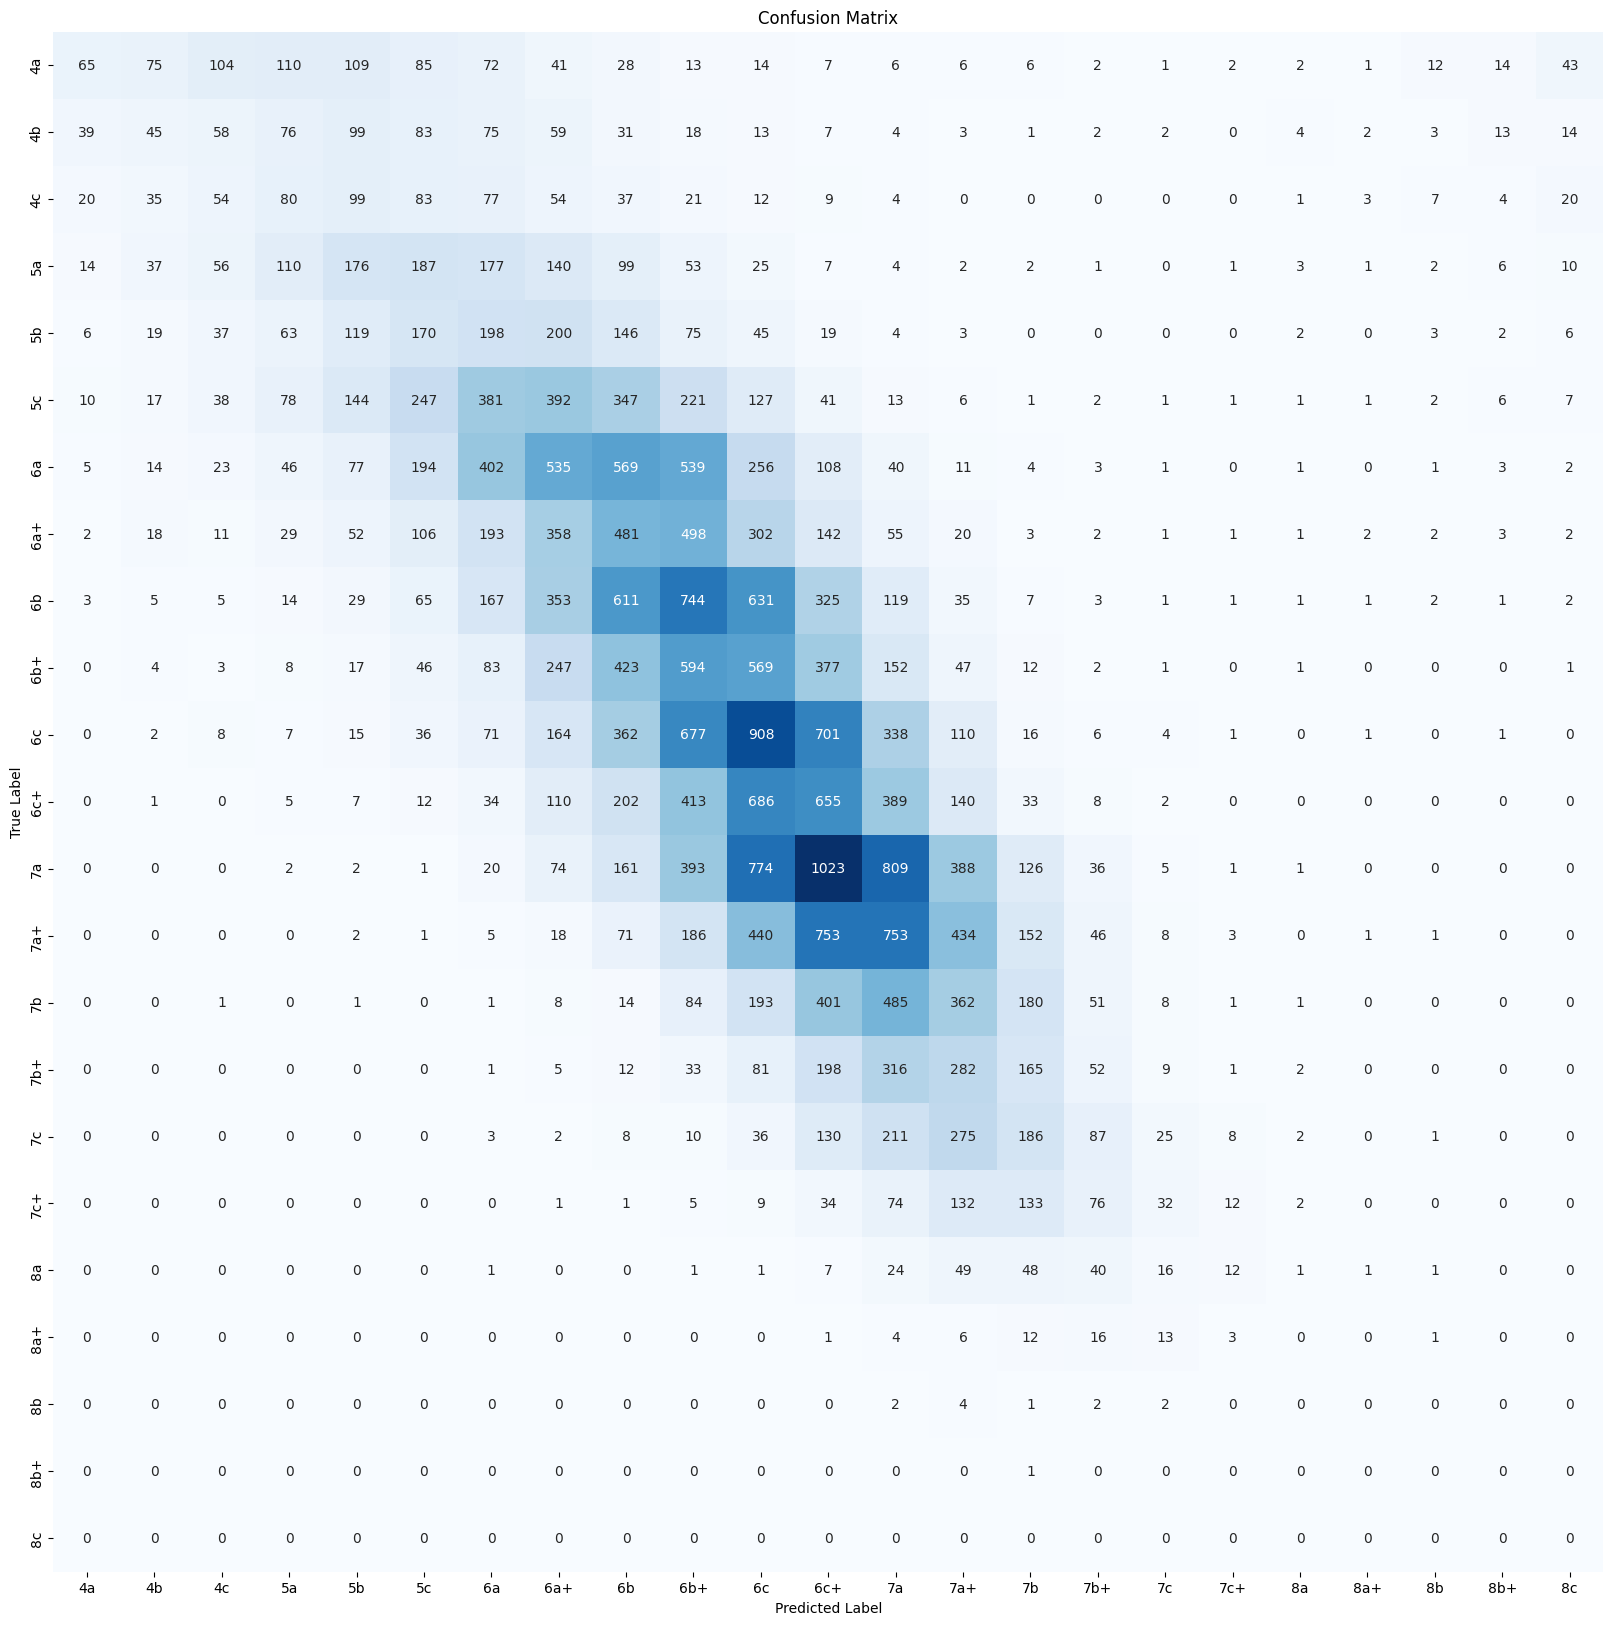

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_back, y_pred_back)
class_labels = categories

# Plot confusion matrix
plt.figure(figsize=(20, 20))  # Adjust the size here

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories,
            cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.pdf', bbox_inches='tight')
plt.show()


In [59]:

y = df.difficulty.str.split('/').str[0].str.replace('+', '')

categories = ['4a', '4b', '4c', 
'5a', '5b', '5c', 
'6a', '6b', '6c',  
'7a', '7b', '7c',  
'8a', '8b', '8c']

encoder = OrdinalEncoder(categories=[categories])

y = encoder.fit_transform(y.values.reshape(-1, 1))


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()  
linear_model.fit(X_train, y_train)

LinearRegression()

In [68]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_pred = linear_model.predict(X_test)
print(f"MAPE: {mean_absolute_percentage_error(y_test + 1, y_pred + 1)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")


MAPE: 0.2547662682175802
MAE: 1.176489004047493
MSE: 2.530104602414216


In [70]:

import numpy as np
y_pred = np.round(y_pred)
y_pred = np.clip(y_pred, 0, 14)

In [71]:
y_pred_back = encoder.inverse_transform(y_pred)
y_test_back = encoder.inverse_transform(y_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test_back, y_pred_back)

0.2940939558700843

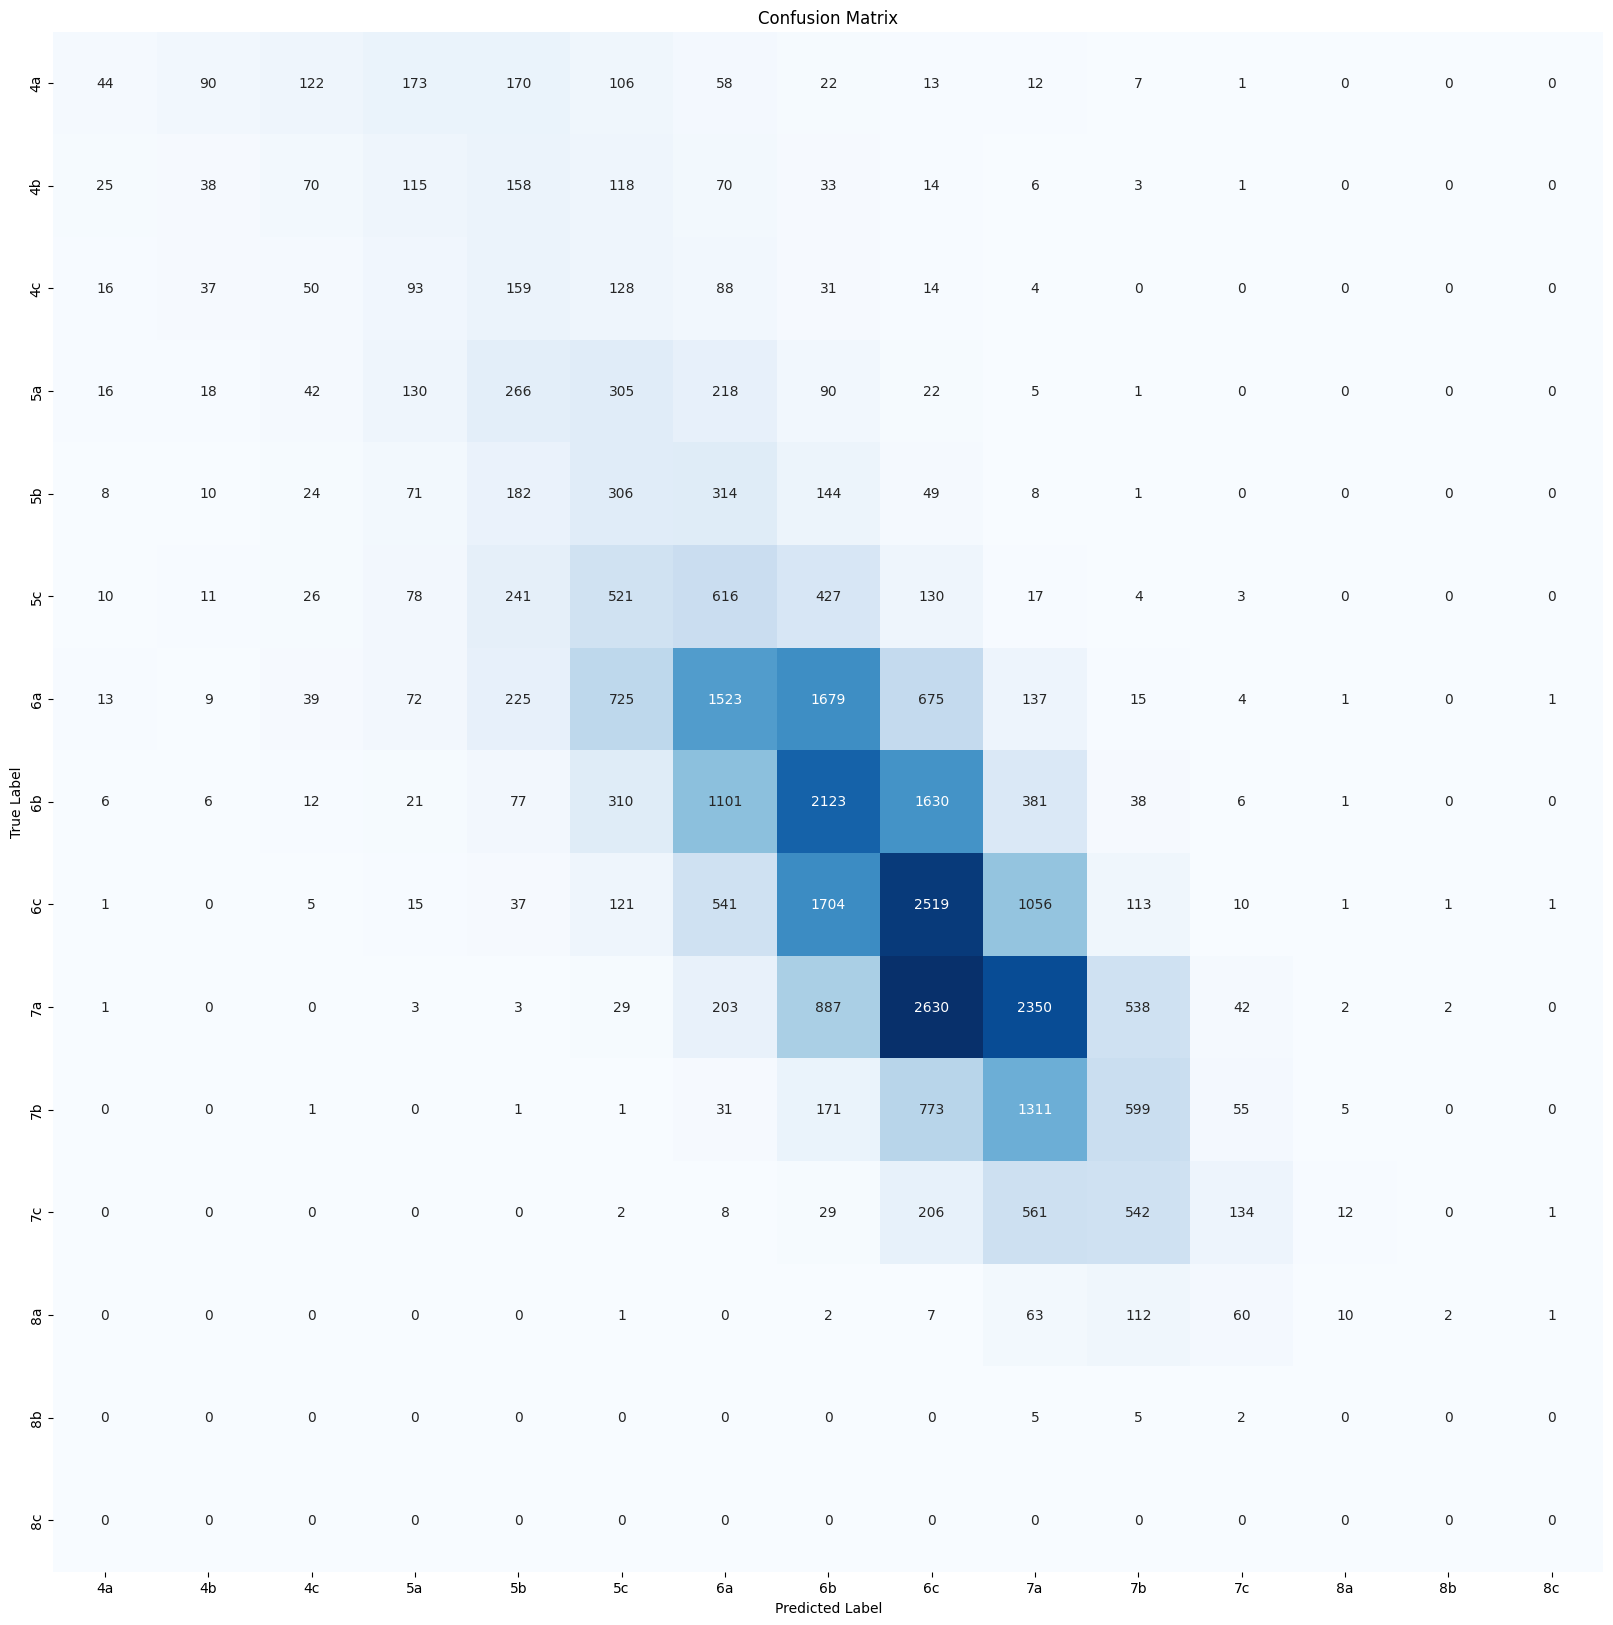

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_back, y_pred_back)
class_labels = categories

# Plot confusion matrix
plt.figure(figsize=(20, 20))  # Adjust the size here

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories,
            cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix2.pdf', bbox_inches='tight')
plt.show()
